In [73]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [75]:
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

In [77]:
w1 = torch.Tensor([1.0])
w2 = torch.Tensor([1.0])
b = torch.Tensor([2.0])

w1.requires_grad = True
w2.requires_grad = True
b.requires_grad = True

In [79]:
def forward1(x):
    return x**2 * w1

def forward2(x):
    return x * w2

def loss(x, y):
    y_pred = forward1(x) + forward2(x) + b
    return (y_pred - y) ** 2

In [81]:
print("Predict (before training)", 4, (forward1(4)+forward2(4)+b).item())

for epoch in range(100):
    for x, y in zip(x_data, y_data):
        l = loss(x, y)
        l.backward()
        print(x, y, '\tgrad(w1)=', w1.grad.item(), '\tgrad(w2)=', w2.grad.item(), '\tgrad(b)=', b.grad.item())

        w1.data = w1.data - 0.01 * w1.grad.data
        w2.data = w2.data - 0.01 * w2.grad.data
        b.data = b.data - 0.01 * b.grad.data

        w1.grad.data.zero_()
        w2.grad.data.zero_()
        b.grad.data.zero_()
        
    print("progress: ", epoch, l.item())

print("Predict (after training)", 4, (forward1(4)+forward2(4)+b).item())

Predict (before training) 4 22.0
1.0 2.0 	grad(w1)= 4.0 	grad(w2)= 4.0 	grad(b)= 4.0
2.0 4.0 	grad(w1)= 29.759998321533203 	grad(w2)= 14.879999160766602 	grad(b)= 7.439999580383301
3.0 6.0 	grad(w1)= 77.05441284179688 	grad(w2)= 25.684804916381836 	grad(b)= 8.561601638793945
progress:  0 18.32525634765625
1.0 2.0 	grad(w1)= 0.4923839569091797 	grad(w2)= 0.4923839569091797 	grad(b)= 0.4923839569091797
2.0 4.0 	grad(w1)= -12.466842651367188 	grad(w2)= -6.233421325683594 	grad(b)= -3.116710662841797
3.0 6.0 	grad(w1)= -40.21345901489258 	grad(w2)= -13.404485702514648 	grad(b)= -4.4681620597839355
progress:  1 4.99111795425415
1.0 2.0 	grad(w1)= 2.0609025955200195 	grad(w2)= 2.0609025955200195 	grad(b)= 2.0609025955200195
2.0 4.0 	grad(w1)= 6.985603332519531 	grad(w2)= 3.4928016662597656 	grad(b)= 1.7464008331298828
3.0 6.0 	grad(w1)= 14.635376930236816 	grad(w2)= 4.8784589767456055 	grad(b)= 1.6261529922485352
progress:  2 0.6610934138298035
1.0 2.0 	grad(w1)= 1.2699527740478516 	grad(w2)

In [83]:
# 提取训练后的参数值
w1_val = w1.item()
w2_val = w2.item()
b_val = b.item()

In [85]:
# 定义训练后的函数
def trained_function(x):
    return w1_val * x**2 + w2_val * x + b_val

In [87]:
# 创建x轴数据点
x_plot = np.linspace(0, 5, 100)
# 计算对应y值
y_plot = trained_function(x_plot)

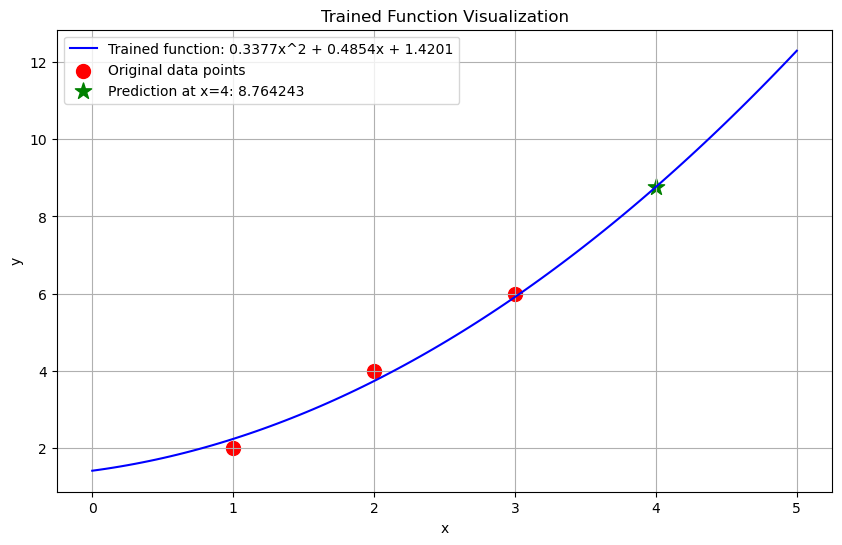

In [93]:
plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, 'b-', label=f'Trained function: {w1_val:.4f}x^2 + {w2_val:.4f}x + {b_val:.4f}')
plt.scatter(x_data, y_data, c='red', s=100, label='Original data points') # s代表marker的size

x_pred = 4
y_pred = trained_function(x_pred)
plt.scatter([x_pred], [y_pred], c='g', s=150, marker='*', label=f'Prediction at x=4: {y_pred:4f}')

plt.title('Trained Function Visualization')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
